# Predicting Churn for Bank Customers

## Author: Emmanuel Edouard Moutoussamy (https://tinyurl.com/3f7ddem8)

The goal of this project is to (1) detect the descriptor that influence the costumer churn and (2) build a model to predict the costumer churn.

### What is costumer churn ?


Summary:
- Data exploration
- Data preprocessing
- Modeling


The dataset used is availbale on Kaggle: https://tinyurl.com/ud43n28s

## Necessary module import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Functions

In [12]:
def MakeMeADonut(labels, data_count):
    """
    Plot a donut chart. Same as a pie chart but cooler ;)
    
    :param labels: labels for the donut chart
    :param data_count: count data for the donut chart
    :return: plot the donut chart
    """
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data_count,explode=(0.03,0.03),labels=labels,
                                      colors=['#982041','#2E5C91'],autopct='%1.1f%%',
                                      shadow=True,pctdistance=0.4)

    plt.setp(texts, size=18)
    plt.setp(autotexts, size=18)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.tight_layout()
    plt.show()


def BuildMatrixCategorical(dataframe,categorical_descriptors):
    """
    Make a np array with the percentage of left and retained 
    customer.
    
    :param dataframe: original pandas dataframe
    :param categorical_descriptors: list of all categorical descriptors
    :return: np array with the percentage of left and retained
    """
    exited = dataframe[dataframe["Exited"] == 1]
    retained = dataframe[dataframe["Exited"] == 0]

    flag = 0
    all_descriptors = []

    for descriptor in categorical_descriptors:
        for descriptor_value in df[descriptor].unique():

            total = df[df[descriptor] == descriptor_value].shape[0]
            state = [((exited[exited[descriptor] == descriptor_value].shape[0])/total)*100,
                     ((retained[retained[descriptor] == descriptor_value].shape[0])/total)*100]

            if descriptor_value == 1:
                descriptor_value = "yes"
            elif descriptor_value == 0:
                descriptor_value = "no"

            all_descriptors.append("{0} : {1}".format(descriptor,descriptor_value))


            if flag == 0:
                matrix_categorical = np.array(state)
                flag = 1
            else:
                matrix_categorical = np.vstack((matrix_categorical,state))


    matrix_categorical = pd.DataFrame(matrix_categorical,\
                                      columns = ["Left","Retained"],\
                                      index = all_descriptors)
    
    return matrix_categorical


def PlotHeatMap(matrix_categorical):
    """
    Plot the heatmap
    :param matrix_categorical: np array with the percentage of left and retained
    """
    
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111)
    hm = sns.heatmap(matrix_categorical,annot =True,annot_kws={"size": 14},\
                     cmap="Spectral",cbar_kws={'label': 'Percent %'})

    hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18)
    hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18)
    ax.figure.axes[-1].yaxis.label.set_size(20)

    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    
    ax.hlines([2, 5, 7], *ax.get_xlim(),linewidth=10, color='w')
    

    plt.show()
    


### Loading dataset:

In [3]:
df = pd.read_csv('input/Churn_Modelling.csv', delimiter=',')

## 1. Data exploration

First let's see what the dataset look like:

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print("\n The dataset contains {0} rows and {1} columns\n ".format(df.shape[0],df.shape[1]))


 The dataset contains 10000 rows and 14 columns
 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset conatins 14 descriptors which can be int or string.

In [7]:
# is there missing values on the dataset:

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values on the dataset (Good news 🥳)

However, we can see that some descriptors are useless for the purpose of this project. Indeed, the row number, the customer id, and the surname do not play a role in the customer churn. These descriptors will be remove for the rest of the project

In [8]:
# Remove RowNumber, CustomerId  and Surname
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)


#let's look at the dataset:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In this dataset we can distinguished two type of descriptors: the categorical and the continuous descriptors. Let's define them for the rest of the proejct:

In [9]:
categorical_descriptors = ["Gender","Geography","HasCrCard","IsActiveMember"]
continuous_descriptors = ["CreditScore", "Age", "Tenure", "Balance","NumOfProducts", "EstimatedSalary"]

### Data visualisation

First, I look at the proportion of customers who left the company on this dataset:

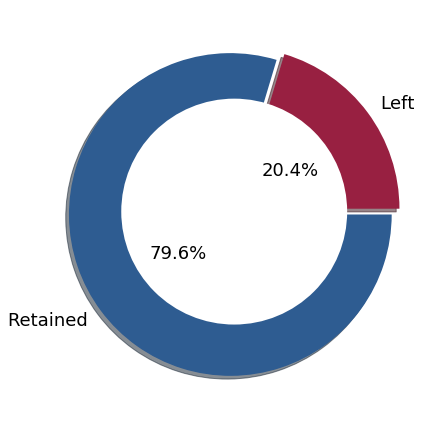

In [10]:
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

MakeMeADonut(['Left', 'Retained'], sizes)

It appears that 20.4% of the customers left the bank in this dataset.

### Let's look at the relation between the categorical variable and the churn status

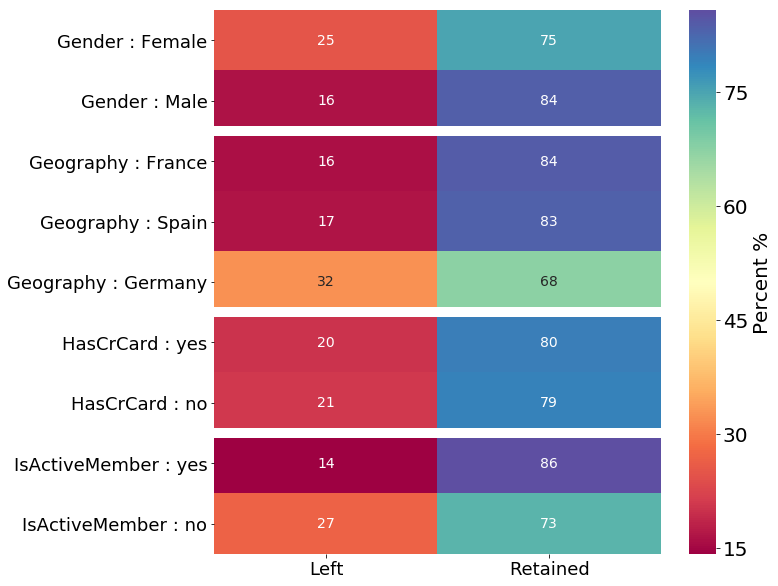

In [13]:
matrix_categorical = BuildMatrixCategorical(df,categorical_descriptors)
PlotHeatMap(matrix_categorical)


Here, the catgorical variables gives us some interresting information:

1. The churn rate is higher for women than men

2. The churn rate is higher for the german costumers (highest churn rate). Frech and Spanish customers have the same churn rate.

3. Having a credit do not to be a key feature for the customer churn

4. As expected, non-active members present a higher chrun rate.

now let's test the correlation:

In [18]:
from scipy.stats import chi2_contingency

chi2_array, p_array = [], []

for column in categorical_descriptors:

    crosstab = pd.crosstab(df[column], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical_descriptors,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
1,Geography,301.255337,3.830318e-66
3,IsActiveMember,242.985342,8.785858e-55
0,Gender,112.918571,2.248210e-26
2,HasCrCard,0.471338,4.923724e-01


### Let's look at the relation between the categorical variable and the churn status

[]

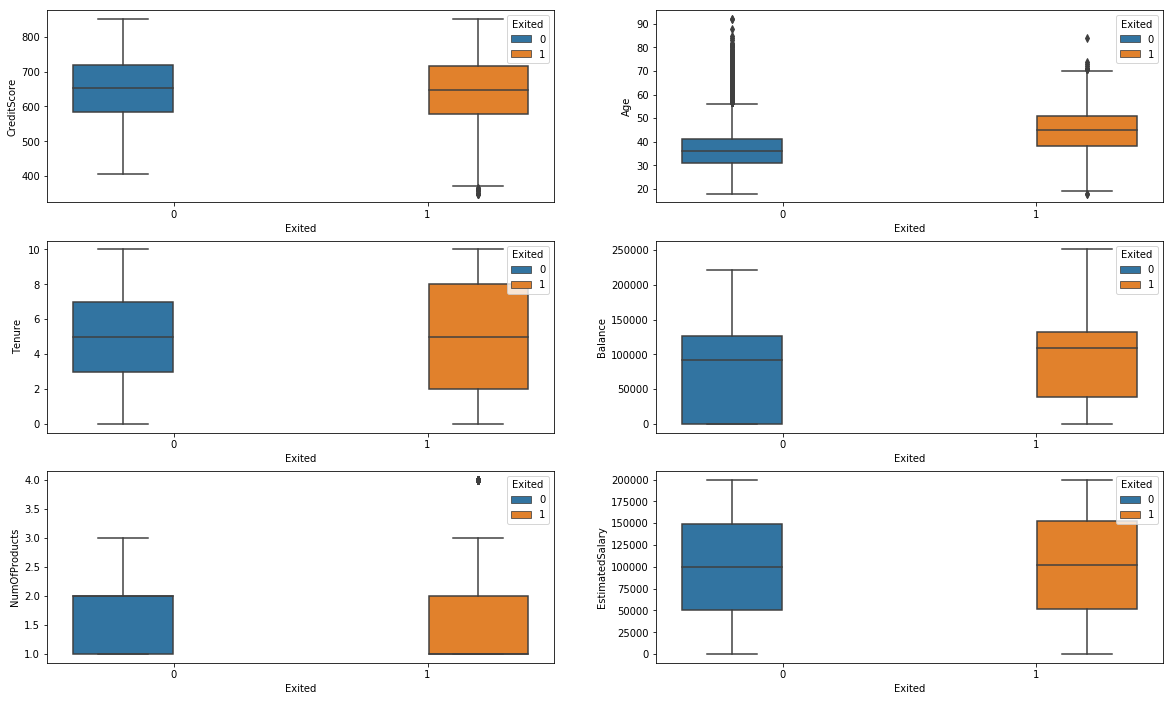

In [20]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

plt.plot()